In [1]:
# Darknet reposunun klonlanması
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13621, done.
remote: Total 13621 (delta 0), reused 0 (delta 0), pack-reused 13621
Receiving objects: 100% (13621/13621), 12.24 MiB | 24.29 MiB/s, done.
Resolving deltas: 100% (9292/9292), done.


In [2]:
# Makefile dosyasını düzenlenmesi, Opencv, GPU VE cuDNN'in aktif edilmesi
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# Cuda yazılımının doğrulanması
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# Makefile dosyasının gcc derleyicisi ile derlenmesi
!make 

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [5]:
# Google Drive ile bağlantının kurulması
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
# Sürekli /content/gdrive/My\ Drive/ linkini yazmamak için bu linke sembolik bir link veriyoruz.
!ln -s /content/gdrive/My\ Drive /mydrive
!ls /mydrive

'Colab Notebooks'   yolov3.ipynb   yolov3-single-drill-detect
 yolov3		    yolov3-multi


In [7]:
# Yolov3 klasörünün Drive'da olup olmadığını kontrol edin
!ls /mydrive/yolov3

backup		   obj.data   obj.zip  yolov3_custom.cfg
generate_train.py  obj.names  test


In [0]:
#Aktif ram kullanımını görüntüleyin (Biraz merak :) )
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13021         600        8729           0        3690       12134
Swap:             0           0           0


In [0]:
# Drive'a yüklediğiniz veri setini sanal makineye kopyalayın
!cp /mydrive/yolov3/obj.zip ../

In [9]:
# Kopyalanan veri setini zip dosyasından çıkartın. darknet/data dizinin içinde obj klasörü ile var olması gerekmektedir.
!unzip /obj.zip -d ./darknet/data/

Archive:  /obj.zip
   creating: ./darknet/data/obj/
  inflating: ./darknet/data/obj/WIN_20200531_16_47_06_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_06_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_15_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_15_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_18_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_18_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_19_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_19_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_21_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_21_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_23_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_23_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_25_Pro.jpg  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_25_Pro.txt  
  inflating: ./darknet/data/obj/WIN_20200531_16_47_2

In [0]:
# Darknet reposundaki cfg dosyasını Drive'a kayıt edin.
!cp darknet/cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

In [0]:
# Düzenlediğiniz cfg dosyasını yeni ismi ile tekrar darknet/cfg klasörüne kopyalayın
!cp /mydrive/yolov3/yolov3_custom.cfg ./darknet/cfg

In [11]:
# Dizini doğrulayın
%cd /content

/content


In [0]:
# Drive'da yüklü olan names ve data dosyalarını darknet/data klasörünün içine kopyalayın
!cp /mydrive/yolov3/obj.names ./darknet/data
!cp /mydrive/yolov3/obj.data  ./darknet/data

In [0]:
# Train.txt uzantılı dosyayı oluşturmak için hazırlanan script'i sanal makinenize kopyalayın
!cp /mydrive/yolov3/generate_train.py /content

In [14]:
# Script'i çalıştırmak için gerekli dizine girin
%cd /content/darknet/ 

/content/darknet


In [0]:
# Script'i çalıştırın. Bu çalışmanın sonunda data klasörünün içinde 'train.txt' uzantılı bir dosyanın oluşması gerekir
!python /content/generate_train.py

In [16]:
# Data klasörünü görünteleyin. obj.names, obj.data ve train.txt dosyalarının data klasörü içinde olduğundan emin olun
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# Omurgamızı oluşturmak için yolov3' ün önceden eğilimiş ağırlık'ını indirin
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-04 23:57:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   460KB/s    in 9m 14s  

2020-06-05 00:06:20 (438 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
# İndirilen ağırlık'ın ilk 74 katmanını kayıt edin ve omurgayı(backbone) oluşturun
!./darknet partial cfg/yolov3.cfg yolov3.weights yolov3.conv.74 74

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 GPU isn't used 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 10

In [0]:
# Şimdi ise veri setinizi eğitmeye başlayabilirsiniz
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg yolov3.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
 3907: 0.027849, 0.040855 avg loss, 0.000010 rate, 3.779794 seconds, 250048 images, 0.187723 hours left
Loaded: 0.000051 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.913683, GIOU: 0.912964), Class: 0.999251, Obj: 0.991368, No Obj: 0.000639, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.001012, iou_loss = 0.022872, total_loss = 0.023884 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 8

In [0]:
%cd /content/darknet/

/content/darknet


In [0]:
# Herhangi bir şekilde bağlantı kopar veya eğitim kesilirse, eğitime son kaldığınız yerden devam etmek için bu kodu çalıştırın
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shor

In [0]:

# Eğitimin ardından sonuçları görmek için gerekli yardımcı fonksiyonlar
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Dosyaları yüklemek için kullanın
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# Dosyaları indirmek için kullanın 
def download(path):
  from google.colab import files
  files.download(path)

In [18]:

# Cfg dosyasını test moduna alın 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

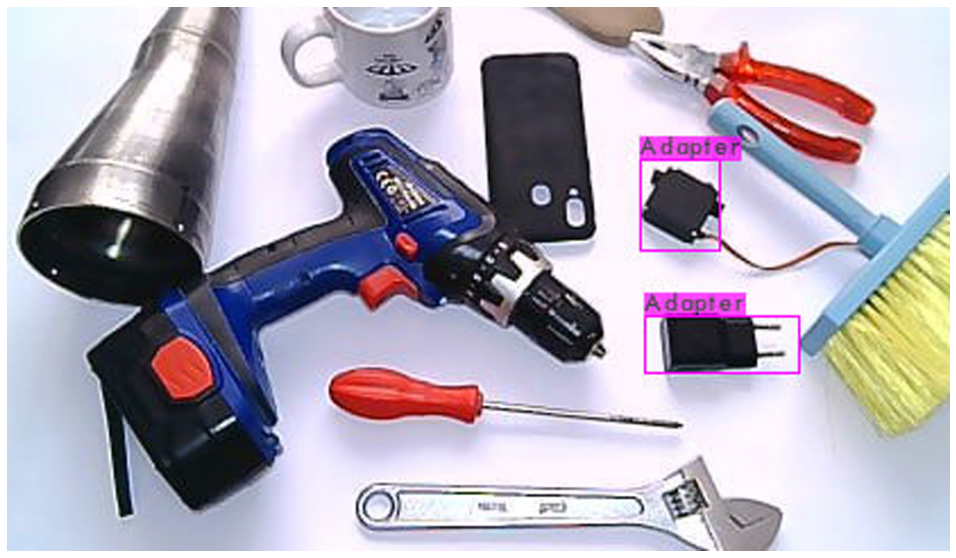

In [39]:
# Eğittiğiniz ağırlıklar ile test işlemini gerçekleştirin
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_best.weights /mydrive/yolov3/test/test_9.png -thresh 0.3
imShow('predictions.jpg')